<a href="https://colab.research.google.com/github/iIsunnyIi/PractisePro/blob/main/PREDICTION_USING_SUPERVISED_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTION USING SUPERVISED ML

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data 

### Importing the required libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

### View Dataset

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploring the data

In [4]:
df.shape

(25, 2)

In [5]:
##checking for null values
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Plotting the distribution of scores

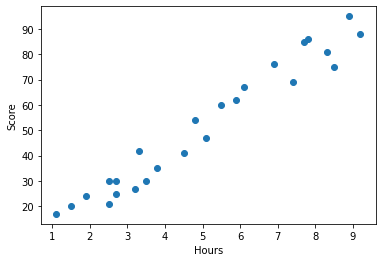

In [10]:
X = df['Hours'].values
y = df['Scores'].values
plt.xlabel('Hours')
plt.ylabel('Score')
plt.plot(X, y, 'o');

### Splitting dataset to test and train datas

In [11]:
X = df.iloc[:, :-1].values
y= df.iloc[:, 1].values

### Using Scikit-Learn's built-in train_test_split() method

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 0)

### Plotting the distribution 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Scores')

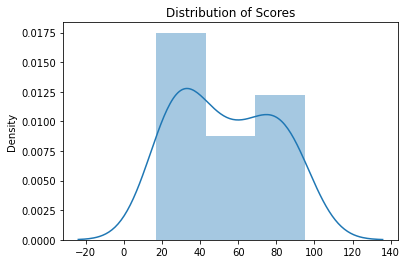

In [13]:
sns.distplot(y_train, kde=True)
plt.title('Distribution of Scores')

### Training the model using linear regression

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Printing the scores

In [15]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9298077534821835
Training Score
0.9529891020405062


### Comparing Actual vs Predicted Value

In [16]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(5)

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


### Visualising the training set results

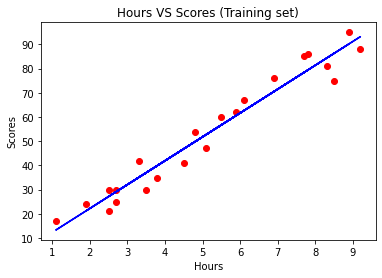

In [17]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train,  regressor.predict(X_train), color= 'blue')
plt.title('Hours VS Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Visualising the test set results

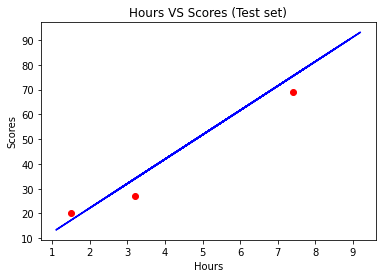

In [18]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,  regressor.predict(X_train), color= 'blue')
plt.title('Hours VS Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Model evaluation

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 5.3994503136120064
Mean Squared Error: 32.865569647342106
Root Mean Squared Error: 5.732850045774972
R-2: 0.9298077534821835


### Testing with some new data

In [20]:
Hours = 9.25
my_pred = regressor.predict([[Hours]])

print('Hours =', Hours, '\nPrediction =', my_pred)

Hours = 9.25 
Prediction = [93.67656425]


R-squared gives the goodness of the fit and as can be seen it is 92.98% which is really good. This means that the algorithm has proven to be good for the given data.

It can also be said that the model's accuracy is 92.98%

## Thank You